
# Prueba de reclutamiento de Python
_Favor de completar lo solicitado abajo una vez complete la prueba técnica_
- Nombre:
- Correo:
- LinkedIn:






Cargando las librerías necesarias...

In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import t

Cargando las archivos necesarios...

In [1058]:
# !git clone https://github.com/Maquililo/prueba-reclutamiento-python

In [1059]:
def load_csv(file_name, skiprows = 4):
    return pd.read_csv('/content/prueba-reclutamiento-python/DATASETS/' + file_name, skiprows = skiprows)

In [1060]:
pib = load_csv('PRODUCTO_INTERNO_BRUTO.csv')
mig = load_csv('MIGRACION_NETA.csv')
rem = load_csv('REMESAS.csv')
ied = load_csv('INVERSION_EXTRANJERA_DIRECTA.csv')

Definición de funciones auxiliares...

In [1061]:
def plot_country_data(pib, mig, rem, ied, country_code):
    plt.figure(figsize = (20, 15))

    plt.subplot(4, 1, 1)
    pib[country_code].plot()
    plt.title(f'PRODUCTO INTERNO BRUTO (PIB) - {country_code}')

    plt.subplot(4, 1, 2)
    mig[country_code].plot()
    plt.title(f'MIGRACIÓN NETA - {country_code}')

    plt.subplot(4, 1, 3)
    rem[country_code].plot()
    plt.title(f'REMESAS PERSONALES - {country_code}')

    plt.subplot(4, 1, 4)
    ied[country_code].plot()
    plt.title(f'INVERSIÓN EXTRANJERA DIRECTA (IED) - {country_code}')

    plt.tight_layout()
    plt.show()

In [1114]:
def forecast(df, lags = 1, steps = 5):
    results = []
    df = df.dropna()

    for country_code in df.columns:
        model = AutoReg(df[country_code], lags = lags).fit()
        forecast_values = model.forecast(steps = steps)

        plt.figure(figsize = (10, 5))
        plt.plot(df[country_code], label = 'Actual')
        plt.plot(forecast_values, label = 'Forecast', linestyle = '--')
        plt.title('PIB Actual vs Forecast (CAN)')
        plt.legend()
        plt.xticks(rotation = 45)
        plt.grid()
        plt.tight_layout()
        plt.show()

        mean = forecast_values.mean()
        std = forecast_values.std()
        n = len(forecast_values)
        t_value = t.ppf(0.95, n - 1)
        margin_of_error = t_value * std / np.sqrt(n)
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error

        results.append({
            'country_code': country_code,
            'mean': mean,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    result_df = pd.DataFrame(results)

    return result_df

In [1063]:
def get_info(column, sort_by = "count", ascending = False):
    counts = column.value_counts()
    percentages = column.value_counts(normalize = True) * 100

    info = pd.DataFrame({
        'count': counts,
        'percentage': percentages.round(2)
    })

    info = info.sort_values(by = sort_by, ascending = ascending)

    return info

# Parta 1 - Estadística Descriptiva

## **PRODUCTO INTERNO BRUTO (PIB)**
Es la suma del valor agregado bruto por todos los productores residentes en la economía más los impuestos sobre los productos y menos los subsidios no incluidos en el valor de los productos. Los valores están en dólares estadounidenses.


In [1064]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    float64
 5   1961            142 non-null    float64
 6   1962            144 non-null    float64
 7   1963            144 non-null    float64
 8   1964            144 non-null    float64
 9   1965            154 non-null    float64
 10  1966            155 non-null    float64
 11  1967            158 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            181 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    flo

In [1065]:
pib.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN


In [1066]:
pib.shape

(266, 69)

In [1067]:
countries = ['Estados Unidos', 'Canadá', 'China']
pib = pib[pib['Country Name'].isin(countries)]

In [1068]:
pib

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
35,Canadá,CAN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,4.056377e+10,4.103819e+10,4.233621e+10,4.514034e+10,4.950366e+10,5.464941e+10,...,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.743725e+12,1.655685e+12,2.007472e+12,2.161483e+12,2.140086e+12,NaN
40,China,CHN,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.971625e+10,5.005669e+10,4.720919e+10,5.070661e+10,5.970813e+10,7.043601e+10,...,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.788178e+13,1.779478e+13,NaN
251,Estados Unidos,USA,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.419886e+11,5.619403e+11,6.036394e+11,6.370586e+11,6.841446e+11,7.419049e+11,...,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.152140e+13,2.132295e+13,2.359403e+13,2.574411e+13,2.736094e+13,NaN


In [1069]:
pib = pib.copy()
columns = ['Country Name', 'Indicator Name', 'Indicator Code', 'Unnamed: 68']
pib.drop(columns = columns, inplace = True)

In [1070]:
pib

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,CAN,4.056377e+10,4.103819e+10,4.233621e+10,4.514034e+10,4.950366e+10,5.464941e+10,6.125242e+10,6.585692e+10,7.204883e+10,...,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.743725e+12,1.655685e+12,2.007472e+12,2.161483e+12,2.140086e+12
40,CHN,5.971625e+10,5.005669e+10,4.720919e+10,5.070661e+10,5.970813e+10,7.043601e+10,7.672001e+10,7.288136e+10,7.084628e+10,...,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.788178e+13,1.779478e+13
251,USA,5.419886e+11,5.619403e+11,6.036394e+11,6.370586e+11,6.841446e+11,7.419049e+11,8.130328e+11,8.596200e+11,9.402250e+11,...,1.760814e+13,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.152140e+13,2.132295e+13,2.359403e+13,2.574411e+13,2.736094e+13


In [1071]:
pib.rename(columns = {'Country Code': 'Year'}, inplace = True)
pib.set_index('Year', inplace = True)
pib = pib.T
pib.index = pd.to_datetime(pib.index, format = '%Y')
pib.index.freq = 'YS'

In [1072]:
pib.head()

Year,CAN,CHN,USA
1960-01-01,4.056377e+10,5.971625e+10,5.419886e+11
1961-01-01,4.103819e+10,5.005669e+10,5.619403e+11
1962-01-01,4.233621e+10,4.720919e+10,6.036394e+11
1963-01-01,4.514034e+10,5.070661e+10,6.370586e+11
1964-01-01,4.950366e+10,5.970813e+10,6.841446e+11


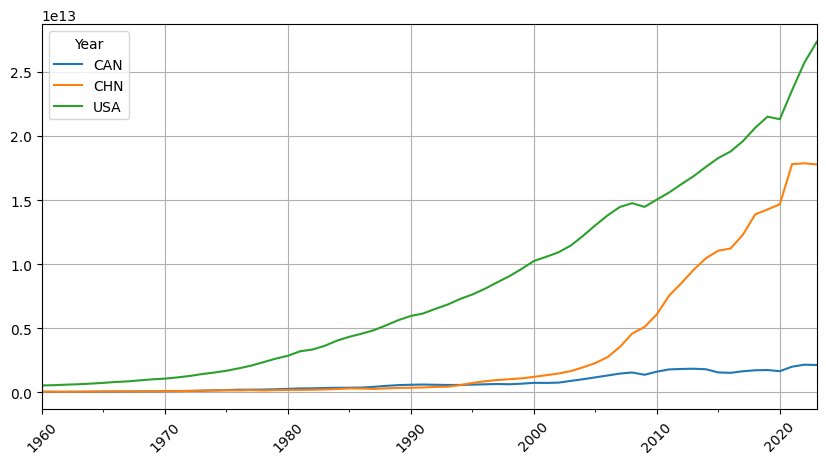

In [1073]:
pib.plot.line(figsize = (10, 5))
plt.xticks(rotation = 45)
plt.grid()

plt.show()

In [1074]:
pib.describe()

Year,CAN,CHN,USA
count,6.400000e+01,6.400000e+01,6.400000e+01
mean,7.552118e+11,3.291242e+12,8.536366e+12
std,6.627923e+11,5.244327e+12,7.425184e+12
min,4.056377e+10,4.720919e+10,5.419886e+11
25%,1.990586e+11,1.528396e+11,1.826285e+12
50%,5.871659e+11,4.051445e+11,6.339228e+12
75%,1.398174e+12,3.811330e+12,1.447519e+13
max,2.161483e+12,1.788178e+13,2.736094e+13


Las tres economías muestran un crecimiento sostenido en su PIB a lo largo del período analizado, aunque con dinámicas marcadamente distintas:
* Estados Unidos: Exhibe un crecimiento constante y robusto a lo largo del tiempo. Su PIB se mantiene en niveles elevados, con una media de aproximadamente 8.54 billones de dólares, y una variabilidad moderada en su evolución (desviación estándar de 7.43 billones). Esto subraya su consolidación como una de las principales economías globales, con un crecimiento que se aprecia de manera consistente pero sin los saltos bruscos que caracteriza a otros países.
* China: Muestra un crecimiento exponencial, especialmente en los últimos años, lo cual refleja su rápida industrialización y ascenso como una potencia económica global. Con una media de 3.29 billones de dólares en su PIB, su crecimiento ha sido notablemente acelerado, con una desviación estándar de 5.24 billones, lo que indica fluctuaciones más amplias. El máximo alcanzado en su PIB (17.88 billones) refleja el impresionante ascenso de la economía china.
* Canadá: Presenta un crecimiento mucho más moderado en comparación con los otros dos países. Su PIB tiene una media de 0.755 billones de dólares y una desviación estándar de 0.662 billones, lo que sugiere un crecimiento estable, pero menos dinámico. A pesar de tener un crecimiento sostenido, el PIB de Canadá no ha mostrado variaciones significativas, manteniéndose a niveles más bajos en comparación con los gigantes económicos de Estados Unidos y China.

## **MIGRACIÓN NETA**
Es el total neto de migrantes durante el período, es decir, el número de inmigrantes menos el número de emigrantes, incluyendo tanto a ciudadanos como a no ciudadanos.

In [1075]:
mig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            265 non-null    float64
 5   1961            265 non-null    float64
 6   1962            265 non-null    float64
 7   1963            265 non-null    float64
 8   1964            265 non-null    float64
 9   1965            265 non-null    float64
 10  1966            265 non-null    float64
 11  1967            265 non-null    float64
 12  1968            265 non-null    float64
 13  1969            265 non-null    float64
 14  1970            265 non-null    float64
 15  1971            265 non-null    float64
 16  1972            265 non-null    float64
 17  1973            265 non-null    flo

In [1076]:
mig.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Migración neta,SM.POP.NETM,0.0,-569.0,-609.0,-646.0,-684.0,-726.0,...,177.0,170.0,218.0,367.0,412.0,0.0,501.0,164.0,157.0,NaN
1,NaN,AFE,Migración neta,SM.POP.NETM,-90849.0,-1348.0,-24259.0,-16266.0,37452.0,11041.0,...,394925.0,-864708.0,-343075.0,-366105.0,-187410.0,-48955.0,-179444.0,-274282.0,-271749.0,NaN
2,Afganistán,AFG,Migración neta,SM.POP.NETM,2606.0,6109.0,7016.0,6681.0,7079.0,10695.0,...,-281739.0,-90238.0,-47090.0,-47205.0,-8082.0,166821.0,-183672.0,-65846.0,-65846.0,NaN
3,NaN,AFW,Migración neta,SM.POP.NETM,-847.0,-41547.0,-36399.0,-37435.0,-45534.0,-15985.0,...,-360393.0,-167286.0,-200823.0,-255888.0,-328552.0,-99761.0,-264802.0,-186109.0,-183333.0,NaN
4,Angola,AGO,Migración neta,SM.POP.NETM,-43749.0,-49186.0,-54566.0,-59777.0,-71948.0,-87288.0,...,74170.0,91623.0,77733.0,61632.0,58986.0,7557.0,29089.0,-1000.0,-1000.0,NaN


In [1077]:
mig.shape

(266, 69)

In [1078]:
mig = mig[mig['Country Name'].isin(countries)]

In [1079]:
mig

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
35,Canadá,CAN,Migración neta,SM.POP.NETM,44527.0,24186.0,26210.0,40913.0,58965.0,103588.0,...,232738.0,320494.0,361274.0,417974.0,391914.0,195181.0,195181.0,248586.0,249746.0,NaN
40,China,CHN,Migración neta,SM.POP.NETM,-118519.0,-179064.0,-219144.0,-219686.0,-183384.0,-128537.0,...,-155379.0,-153054.0,-180592.0,-296674.0,-302609.0,-33649.0,-200194.0,-311380.0,-310220.0,NaN
251,Estados Unidos,USA,Migración neta,SM.POP.NETM,583458.0,541424.0,549734.0,588381.0,501115.0,497365.0,...,1221849.0,1449371.0,1377630.0,1200796.0,1158444.0,675560.0,561580.0,998540.0,999700.0,NaN


In [1080]:
mig = mig.copy()
mig.drop(columns = columns, inplace = True)

In [1081]:
mig

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,CAN,44527.0,24186.0,26210.0,40913.0,58965.0,103588.0,135984.0,124220.0,103269.0,...,195649.0,232738.0,320494.0,361274.0,417974.0,391914.0,195181.0,195181.0,248586.0,249746.0
40,CHN,-118519.0,-179064.0,-219144.0,-219686.0,-183384.0,-128537.0,-73698.0,-37406.0,-37291.0,...,-198432.0,-155379.0,-153054.0,-180592.0,-296674.0,-302609.0,-33649.0,-200194.0,-311380.0,-310220.0
251,USA,583458.0,541424.0,549734.0,588381.0,501115.0,497365.0,337814.0,377776.0,502456.0,...,1250914.0,1221849.0,1449371.0,1377630.0,1200796.0,1158444.0,675560.0,561580.0,998540.0,999700.0


In [1082]:
mig.rename(columns = {'Country Code': 'Year'}, inplace = True)
mig.set_index('Year', inplace = True)
mig = mig.T
mig.index = pd.to_datetime(mig.index, format = '%Y')
mig.index.freq = 'YS'

In [1083]:
mig.head()

Year,CAN,CHN,USA
1960-01-01,44527.0,-118519.0,583458.0
1961-01-01,24186.0,-179064.0,541424.0
1962-01-01,26210.0,-219144.0,549734.0
1963-01-01,40913.0,-219686.0,588381.0
1964-01-01,58965.0,-183384.0,501115.0


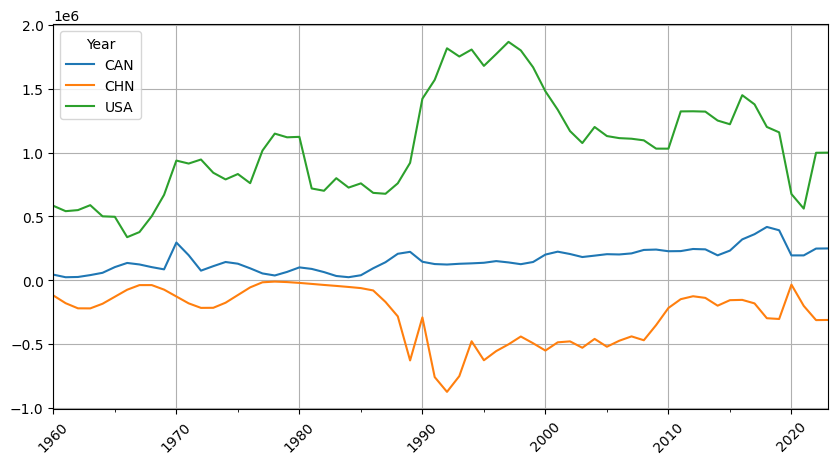

In [1084]:
mig.plot.line(figsize = (10, 5))
plt.xticks(rotation = 45)
plt.grid()

plt.show()

In [1085]:
mig.describe()

Year,CAN,CHN,USA
count,64.000000,64.000000,6.400000e+01
mean,159173.750000,-266722.390625,1.048512e+06
std,89526.821057,213719.557029,3.983821e+05
min,24186.000000,-873177.000000,3.378140e+05
25%,94271.250000,-461152.000000,7.242775e+05
50%,142597.000000,-199313.000000,1.030870e+06
75%,213880.500000,-106209.500000,1.321238e+06
max,417974.000000,-9923.000000,1.866819e+06


En la migración neta, un valor positivo indica que hay más inmigración que emigración, mientras que un valor negativo indica lo contrario, estas tres potencias reflejan dinámicas marcadamente distintas:
* Estados Unidos: A lo largo de los años, ha sido tradicionalmente un destino para inmigrantes, con una migración neta positiva en la mayoría de los períodos. Los datos revelan que la migración neta de Estados Unidos muestra una media de aproximadamente 1.05 millones, con fluctuaciones importantes en su trayectoria (desviación estándar de 398,382). Esto sugiere que, aunque el país sigue siendo un atractivo centro para los inmigrantes, sus flujos migratorios están sujetos a cambios significativos, probablemente debido a modificaciones en las políticas migratorias y la economía nacional. En los últimos años, las migraciones netas alcanzaron cifras cercanas a 1.87 millones en su punto máximo, pero también hubo períodos con descensos notables, como el mínimo de 337,814.
* Canadá: Ha mostrado una tendencia más estable en términos de migración neta positiva, con una media de 159,173 y una desviación estándar de 89,527. Aunque también presenta fluctuaciones, el patrón de migración es relativamente constante a lo largo de los años en comparación con Estados Unidos. Esto podría ser indicativo de políticas migratorias más predecibles y un entorno más estable para los inmigrantes. En su punto más bajo, se registró solo 24,186 migrantes netos, mientras que en su máximo alcanzó 417,974, lo que refleja tanto el atractivo constante del país como su capacidad para acoger un número significativo de inmigrantes en ciertos años.
* China: Esta muestra una tendencia compleja, con una media negativa de -266,722, lo que indica que China ha tenido una emigración neta en la mayoría de los años. Los datos de migración neta son considerablemente más inestable que en los otros dos países, con una desviación estándar de 213,720. Este patrón irregular podría estar relacionado con factores como las políticas internas del gobierno, las oportunidades laborales, y las restricciones migratorias. En algunos años, la emigración ha sido particularmente alta, como lo demuestra el valor mínimo de -873,177, mientras que en otros períodos, los flujos migratorios fueron mucho más moderados, como se refleja en el valor máximo de -9,923.

## **REMESAS PERSONALES**
Las remesas personales comprenden transferencias personales y
compensaciones de empleados.

In [1086]:
rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            12 non-null     float64
 15  1971            15 non-null     float64
 16  1972            17 non-null     float64
 17  1973            17 non-null     flo

In [1087]:
rem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN,NaN
1,NaN,AFE,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224280,1.105184,1.075252,1.359812,1.498650,1.504133,1.599903,1.713108,1.655014,NaN
2,Afganistán,AFG,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,2.206568,NaN,NaN
3,NaN,AFW,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.057538,4.107118,4.608343,4.499426,4.245257,3.713186,3.612465,3.737629,4.111046,NaN
4,Angola,AGO,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013415,0.014242,NaN


In [1088]:
rem.shape

(266, 69)

In [1089]:
rem = rem[rem['Country Name'].isin(countries)]

In [1090]:
rem

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
35,Canadá,CAN,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081866,0.084380,0.076894,0.075091,0.075229,0.049637,0.041420,0.039965,0.039587,NaN
40,China,CHN,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.299276,0.239317,0.232939,0.174925,0.128112,0.128517,0.126147,0.145923,0.163589,NaN
251,Estados Unidos,USA,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035955,0.033661,0.032363,0.033602,0.032753,0.032017,0.030063,0.028772,0.028270,NaN


In [1091]:
rem = rem.copy()
rem.drop(columns = columns, inplace = True)

In [1092]:
rem

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,CAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.074833,0.081866,0.084380,0.076894,0.075091,0.075229,0.049637,0.041420,0.039965,0.039587
40,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.285525,0.299276,0.239317,0.232939,0.174925,0.128112,0.128517,0.126147,0.145923,0.163589
251,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036932,0.035955,0.033661,0.032363,0.033602,0.032753,0.032017,0.030063,0.028772,0.028270


In [1093]:
rem.rename(columns = {'Country Code': 'Year'}, inplace = True)
rem.set_index('Year', inplace = True)
rem = rem.T
rem.index = pd.to_datetime(rem.index, format = '%Y')
rem.index.freq = 'YS'

In [1094]:
rem.head()

Year,CAN,CHN,USA
1960-01-01,NaN,NaN,NaN
1961-01-01,NaN,NaN,NaN
1962-01-01,NaN,NaN,NaN
1963-01-01,NaN,NaN,NaN
1964-01-01,NaN,NaN,NaN


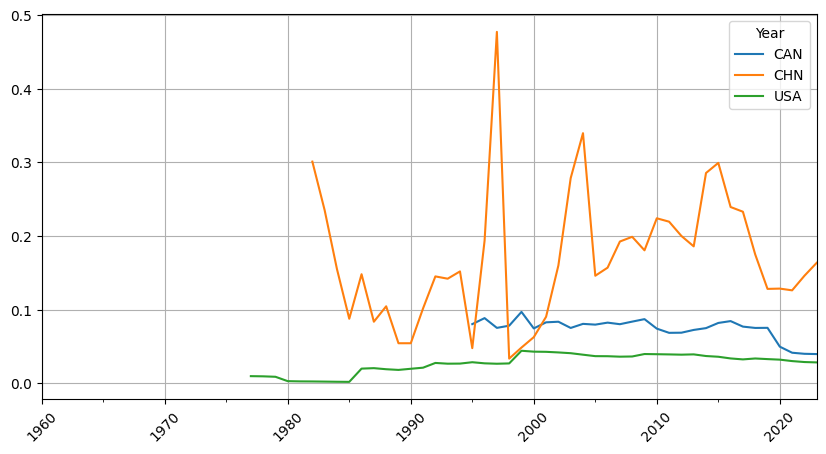

In [1095]:
rem.plot.line(figsize = (10, 5))
plt.xticks(rotation = 45)
plt.grid()

plt.show()

In [1096]:
rem.describe()

Year,CAN,CHN,USA
count,29.000000,42.000000,47.000000
mean,0.074155,0.169610,0.026946
std,0.014196,0.089620,0.012982
min,0.039587,0.033429,0.001844
25%,0.074144,0.109895,0.019724
50%,0.076894,0.155992,0.028772
75%,0.082295,0.214556,0.036853
max,0.096863,0.477224,0.044086


Las remesas personales, como su nombre lo indica, son transferencias de dinero enviadas por individuos a sus familiares o amigos en otros países. Cada país presenta un patrón distintivo en el envío de remesas:
* Canadá: A lo largo de las tres primeras décadas de observación, las remesas en Canadá muestran un patrón relativamente estable, con una media de 0.074155. Sin embargo, a finales de los años 90 y principios de los 2000, se observa un aumento significativo, alcanzando un máximo de 0.096863. Posteriormente, después de este pico, las remesas experimentan una disminución gradual, estabilizándose a niveles ligeramente inferiores a los máximos alcanzados, con una mediana de 0.076894. El comportamiento general se caracteriza por una baja volatilidad, reflejada en una desviación estándar de 0.014196, indicando poca fluctuación a lo largo del tiempo.
* China: Ees mucho más volátil. Inicia con un fuerte descenso en los primeros años de la década de los 80, con valores cercanos a 0.033429, y muestra una serie de fluctuaciones significativas a lo largo del período observado. Sin embargo, tras los descensos de finales de los 90, se observa un crecimiento sostenido durante los años 2000, alcanzando un pico máximo de 0.477224 en la mitad de la década. Este auge se ve seguido de una tendencia a la baja. La media para China es de 0.169610, con una desviación estándar de 0.089620, lo que refleja la alta volatilidad e inestabilidad en el flujo de remesas a lo largo del período.
* Estados Unidos: El comportamiento de las remesas hacia este país muestra una tendencia estable y gradual. En las primeras décadas, se mantiene en niveles bajos, con un valor mínimo de 0.001844. A partir de mediados de los años 90, se observa un crecimiento sostenido que continúa, aunque a un ritmo más moderado en comparación con los anteriores. El valor medio de las remesas es de 0.026946, y la desviación estándar de 0.012982 indica que las fluctuaciones son menores en comparación con China. El pico alcanza los 0.044086 hacia finales del período analizado, destacándose una tendencia estable y con un crecimiento sostenido más suave.

## **INVERSIÓN EXTRANJERA DIRECTA (IED)**
Es la suma del capital social, la reinversión de ganancias y otros capitales. La inversión directa es una categoría de inversión transfronteriza asociada con un residente en una economía que tiene control o un grado significativo de influencia en la gestión de una empresa que reside en otra economía.

In [1097]:
ied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            140 non-null    float64
 15  1971            142 non-null    float64
 16  1972            151 non-null    float64
 17  1973            154 non-null    flo

In [1098]:
ied.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.907264,0.923398,5.253373,4.399822,-2.215283,6.294368,4.303487,7.000585,NaN,NaN
1,NaN,AFE,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.191087,2.017779,1.099985,1.338311,1.500133,1.482811,5.039673,1.748597,1.886923,NaN
2,Afganistán,AFG,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.884000,0.516606,0.274797,0.661572,0.124496,0.064994,0.144401,NaN,NaN,NaN
3,NaN,AFW,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.157298,2.260698,2.587302,1.946433,1.556177,1.395569,2.011143,1.892716,2.088676,NaN
4,Angola,AGO,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.081339,-0.340243,-10.038377,-8.125891,-5.780813,-3.848264,-6.548542,-6.320564,-2.501839,NaN


In [1099]:
ied.shape

(266, 69)

In [1100]:
ied = ied[ied['Country Name'].isin(countries)]

In [1101]:
ied

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
35,Canadá,CAN,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.853895,2.238350,1.537521,2.469312,2.806767,1.758971,2.945251,2.312517,2.230995,NaN
40,China,CHN,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.192178,1.555637,1.349124,1.693894,1.310716,1.723176,1.930786,1.063673,0.240114,NaN
251,Estados Unidos,USA,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.795482,2.522681,1.941776,1.039454,1.468232,0.642810,2.016633,1.588643,1.274752,NaN


In [1102]:
ied = ied.copy()
ied.drop(columns = columns, inplace = True)

In [1103]:
ied

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
35,CAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.553903,3.853895,2.238350,1.537521,2.469312,2.806767,1.758971,2.945251,2.312517,2.230995
40,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.559248,2.192178,1.555637,1.349124,1.693894,1.310716,1.723176,1.930786,1.063673,0.240114
251,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.430339,2.795482,2.522681,1.941776,1.039454,1.468232,0.642810,2.016633,1.588643,1.274752


In [1104]:
ied.rename(columns = {'Country Code': 'Year'}, inplace = True)
ied.set_index('Year', inplace = True)
ied = ied.T
ied.index = pd.to_datetime(ied.index, format = '%Y')
ied.index.freq = 'YS'

In [1105]:
ied.head()

Year,CAN,CHN,USA
1960-01-01,NaN,NaN,NaN
1961-01-01,NaN,NaN,NaN
1962-01-01,NaN,NaN,NaN
1963-01-01,NaN,NaN,NaN
1964-01-01,NaN,NaN,NaN


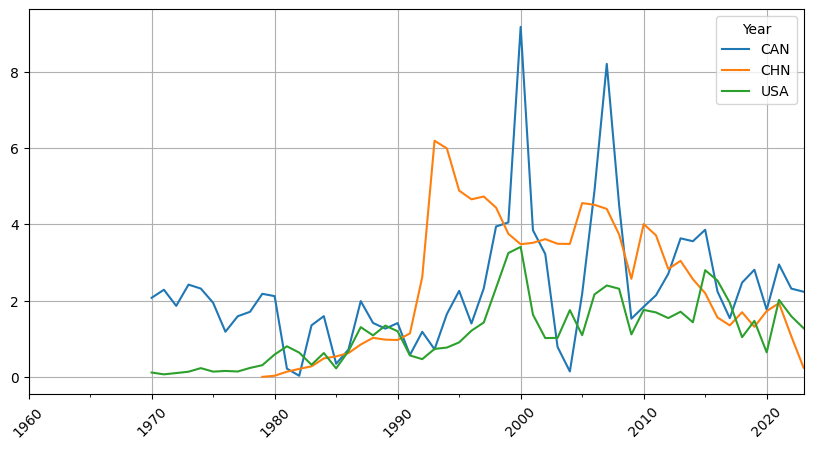

In [1106]:
ied.plot.line(figsize = (10, 5))
plt.xticks(rotation = 45)
plt.grid()

plt.show()

In [1107]:
ied.describe()

Year,CAN,CHN,USA
count,54.000000,45.000000,54.000000
mean,2.305729,2.466827,1.173055
std,1.673069,1.734910,0.836052
min,0.028623,0.000045,0.066103
25%,1.410322,0.975650,0.567252
50%,2.093689,2.559248,1.089235
75%,2.642455,3.733611,1.674359
max,9.171024,6.186882,3.405781


El flujo de Inversión Extranjera Directa (IED) a lo largo de los años en estos países se puede definir de la siguiente manera:
* Canadá: El flujo de IED hacia Canadá muestra una tendencia inestable a lo largo de las décadas observadas. Durante los años 70 y 80, se experimenta un crecimiento moderado, con una media de 2.305729, aunque con una desviación estándar bastante alta (1.673069), lo que indica fluctuaciones significativas. A principios de los 2000, se alcanza un pico significativo con un máximo de 9.171024, seguido de una disminución y posterior recuperación en los años siguientes. Este comportamiento errático podría reflejar diversos factores como ciclos económicos globales, cambios en políticas gubernamentales, o eventos específicos que afectaron la confianza de los inversores. El valor mediano es de 2.093689, lo que sugiere que, a pesar de la volatilidad, el flujo de IED se mantuvo cerca de este valor durante la mayor parte del período.
* China: La IED en China muestra un crecimiento exponencial a partir de los años 80, con una media de 2.466827 y un máximo de 6.186882, lo que refleja la apertura económica y las reformas que implementó el país para atraer inversión extranjera. A pesar de algunos descensos ocasionales, la tendencia general es ascendente, lo que se ve reflejado en una mediana de 2.559248. La desviación estándar de 1.734910 es relativamente alta, indicando fluctuaciones en el flujo, pero estas caídas son menores en comparación con el crecimiento global.
* Estados Unidos: Presenta un comportamiento más gradual y estable en cuanto a la IED, con una media de 1.173055, aunque con algunas fluctuaciones menores. Durante las primeras décadas, los valores son relativamente bajos, con un mínimo de 0.066103, pero a partir de finales de los 90, se observa un aumento más pronunciado, alcanzando un máximo de 3.405781. La mediana se sitúa en 1.089235, lo que sugiere que la mayoría de los flujos de IED estuvieron cercanos a este valor. La desviación estándar de 0.836052 es más baja que en los otros dos países, lo que indica que las fluctuaciones en la IED fueron más moderadas.

## Relación Esperada entre Variables y Crecimiento Económico

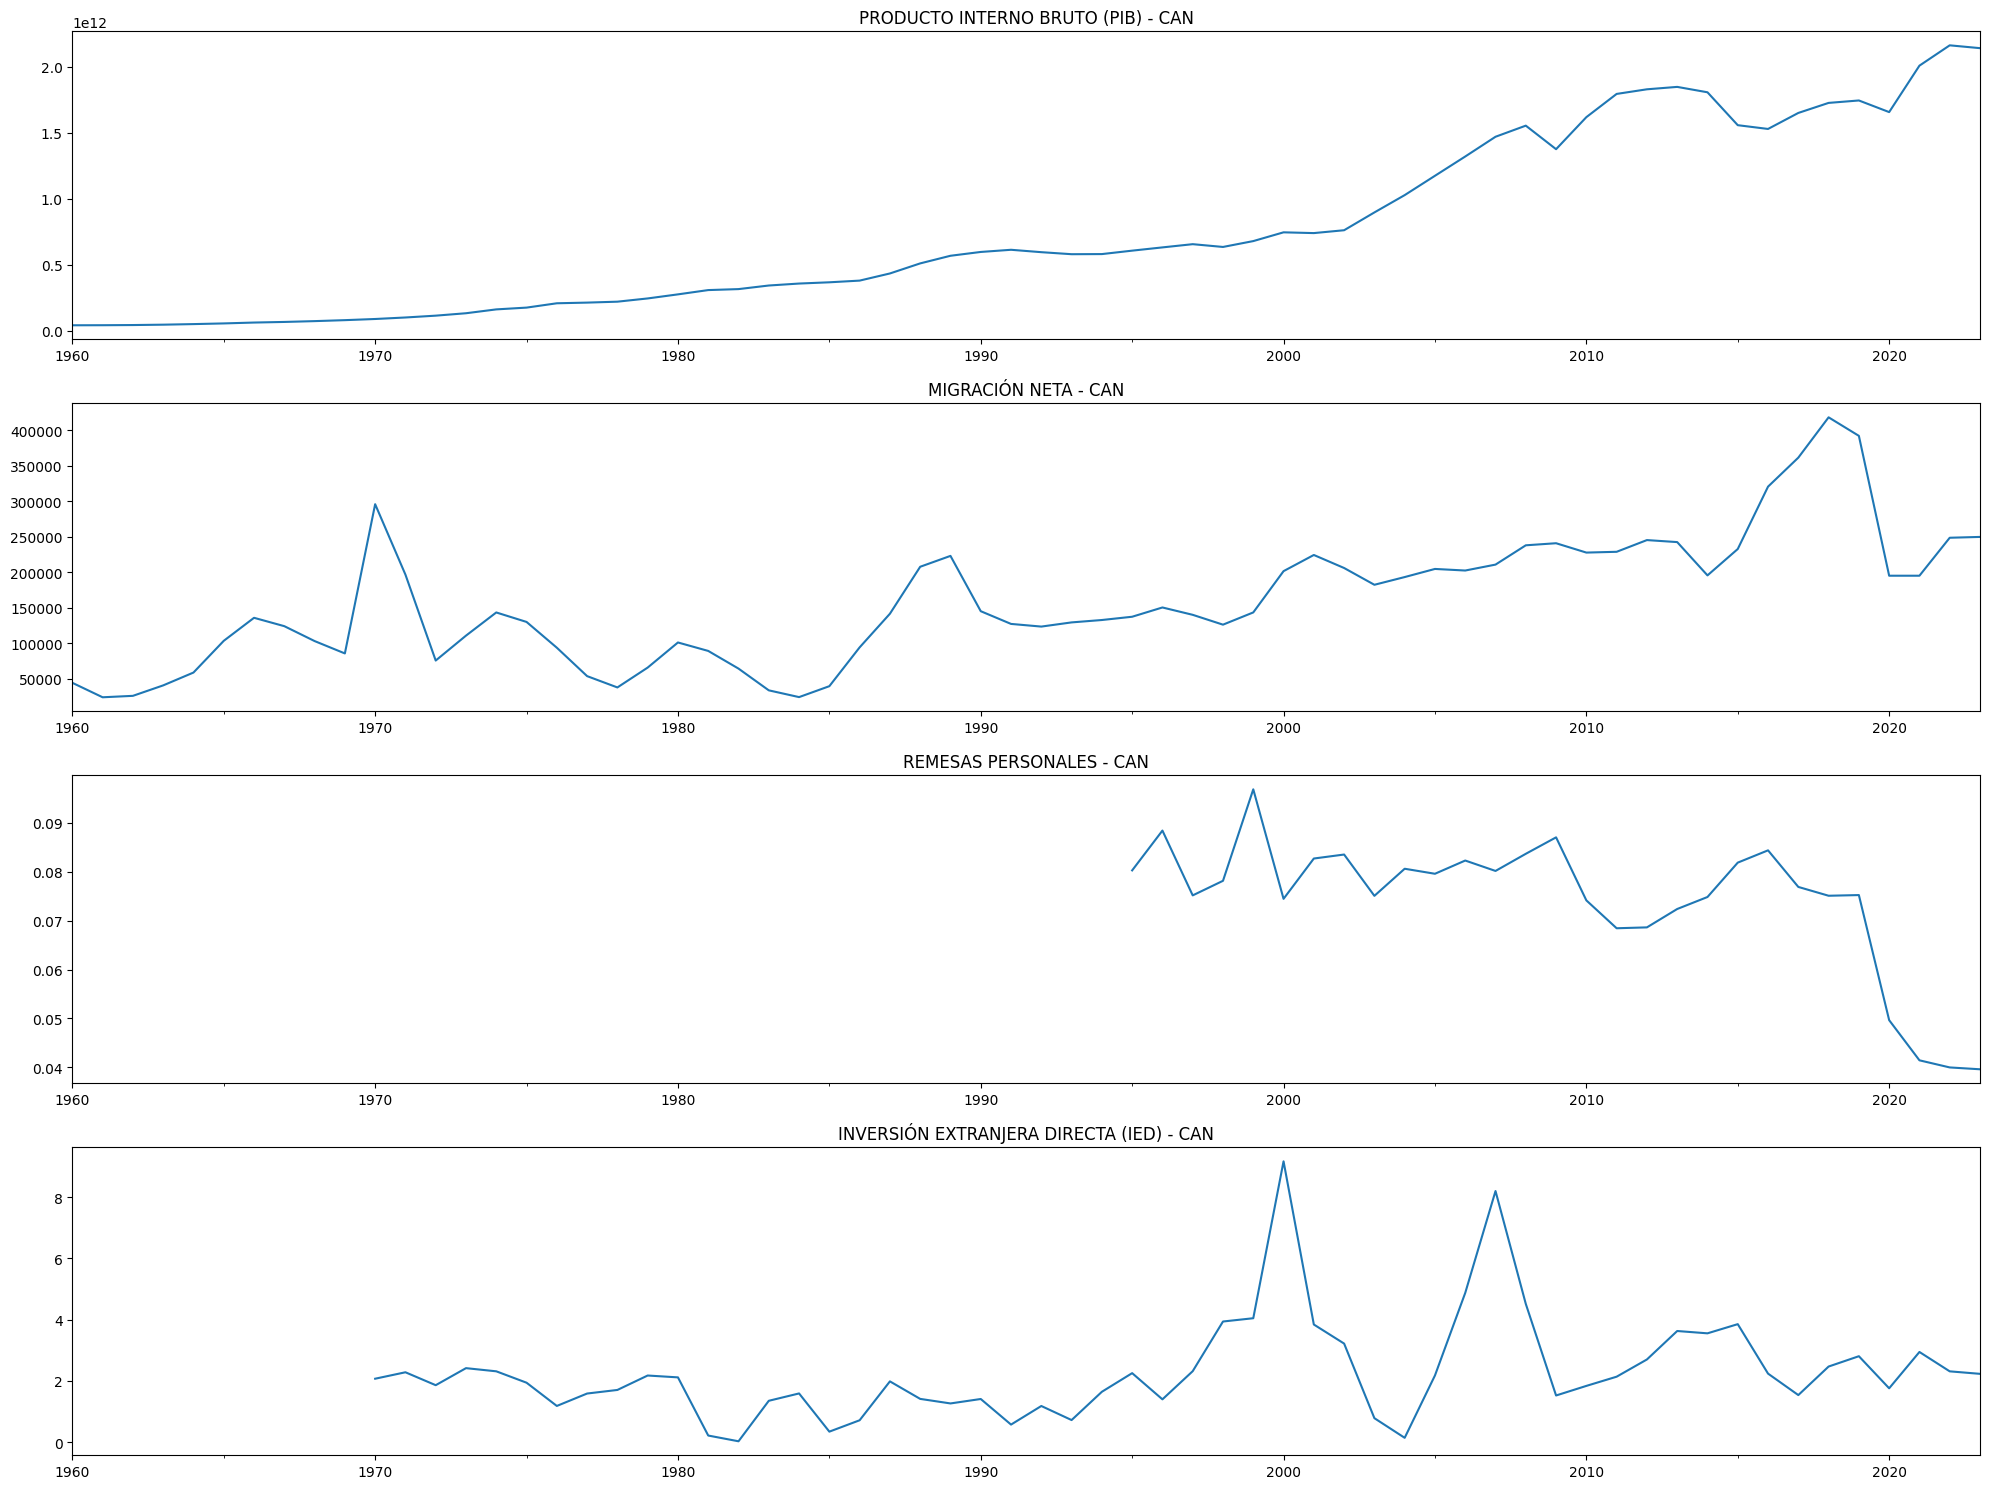

In [1108]:
plot_country_data(pib, mig, rem, ied, 'CAN')

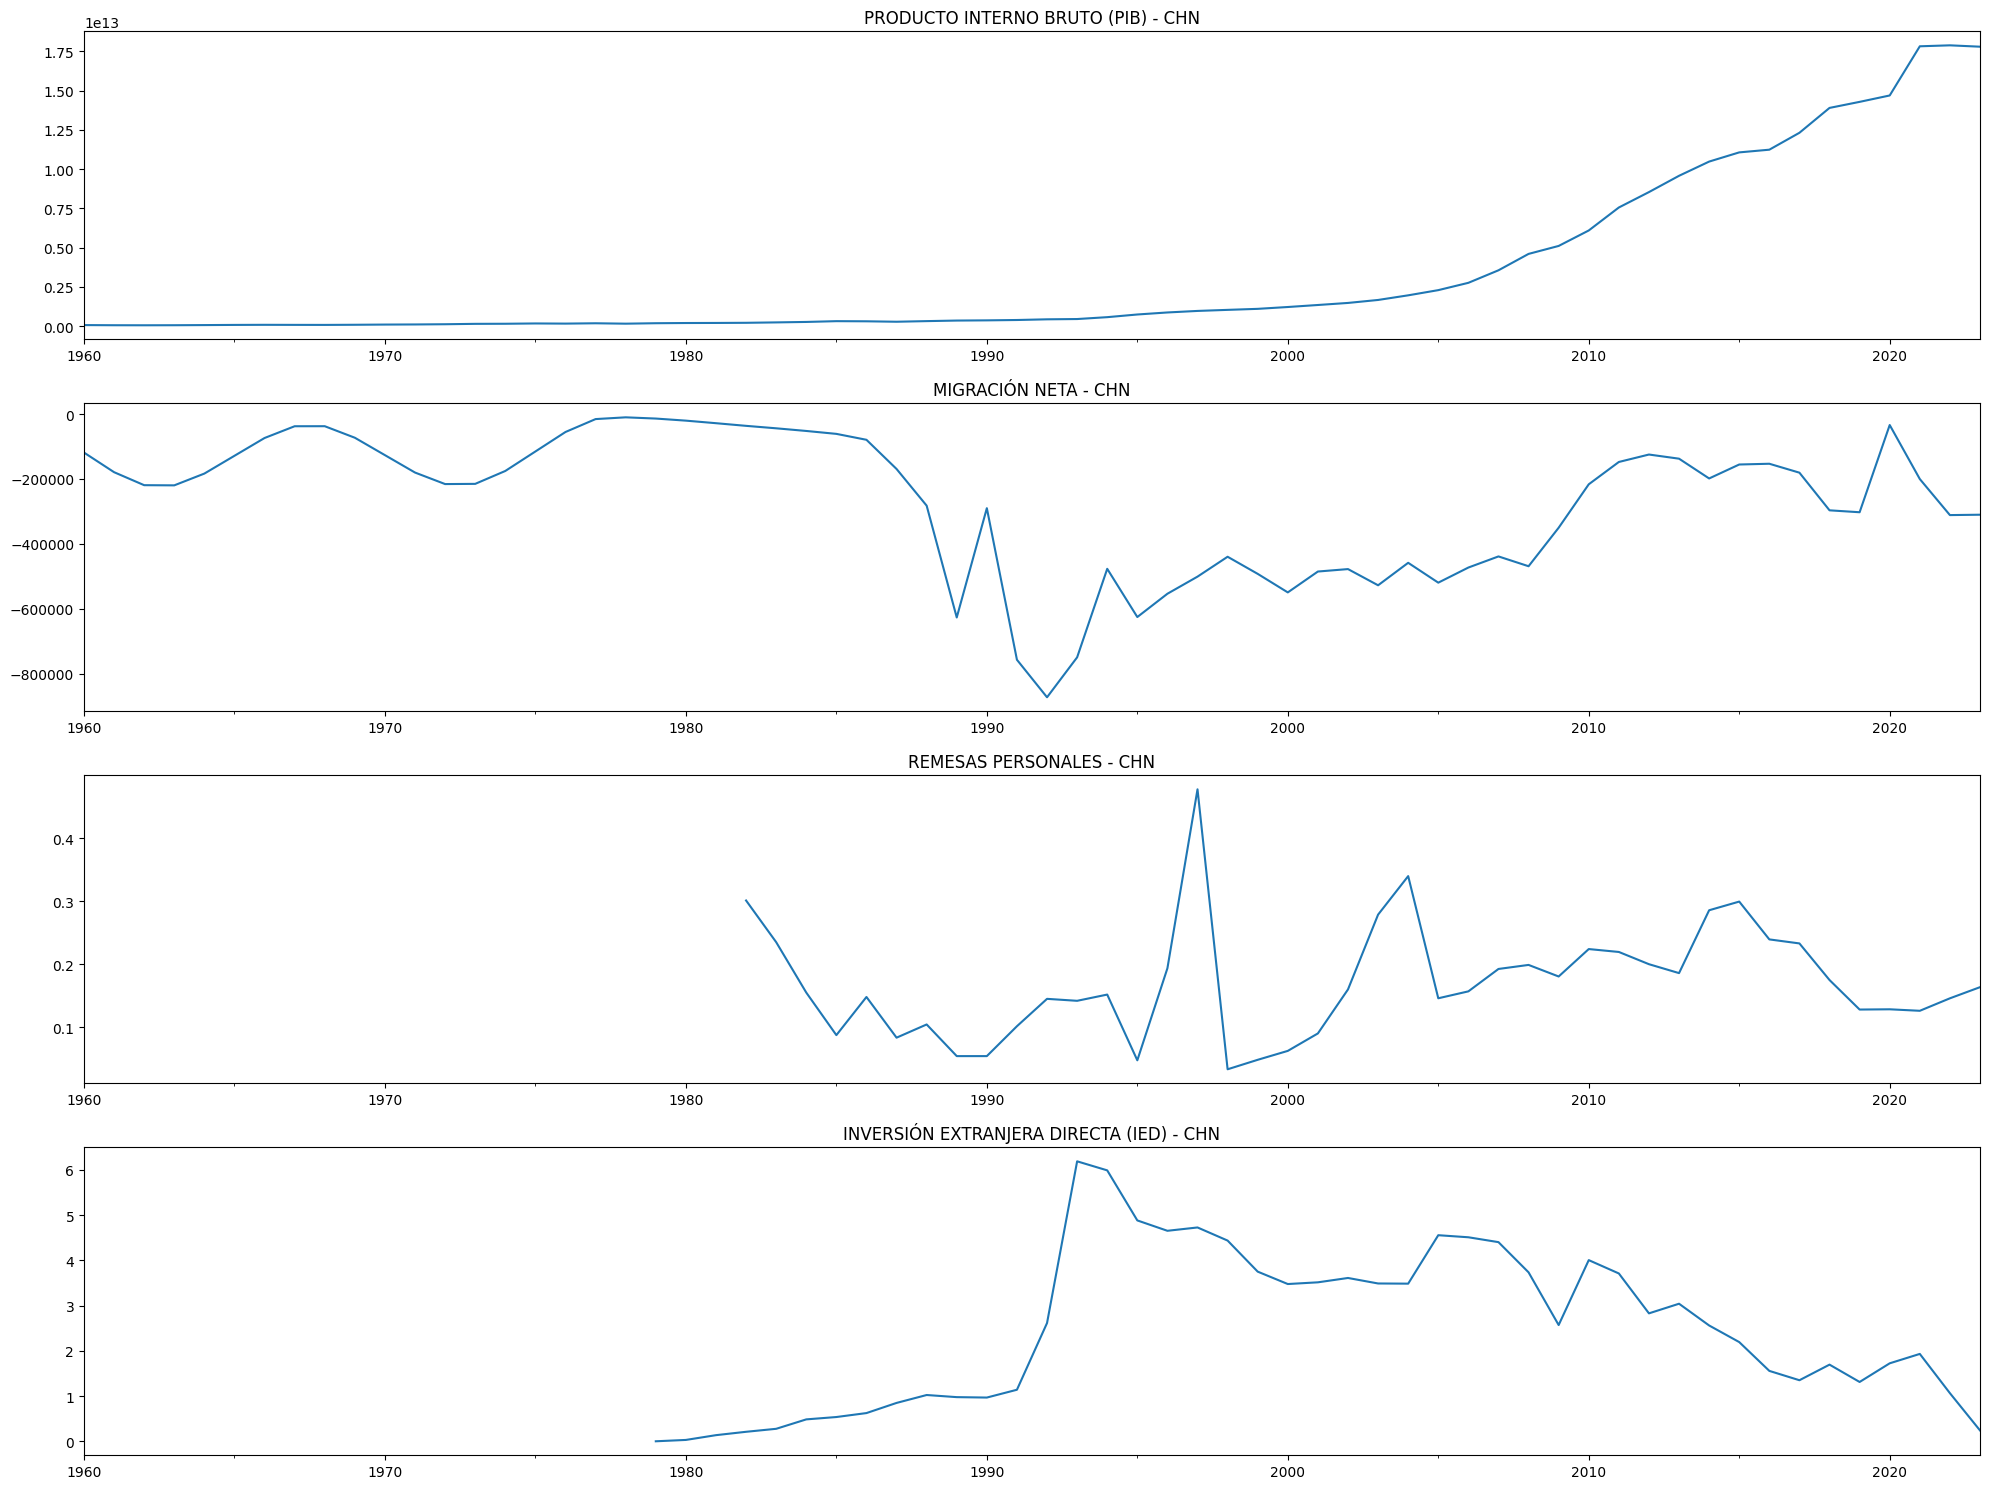

In [1109]:
plot_country_data(pib, mig, rem, ied, 'CHN')

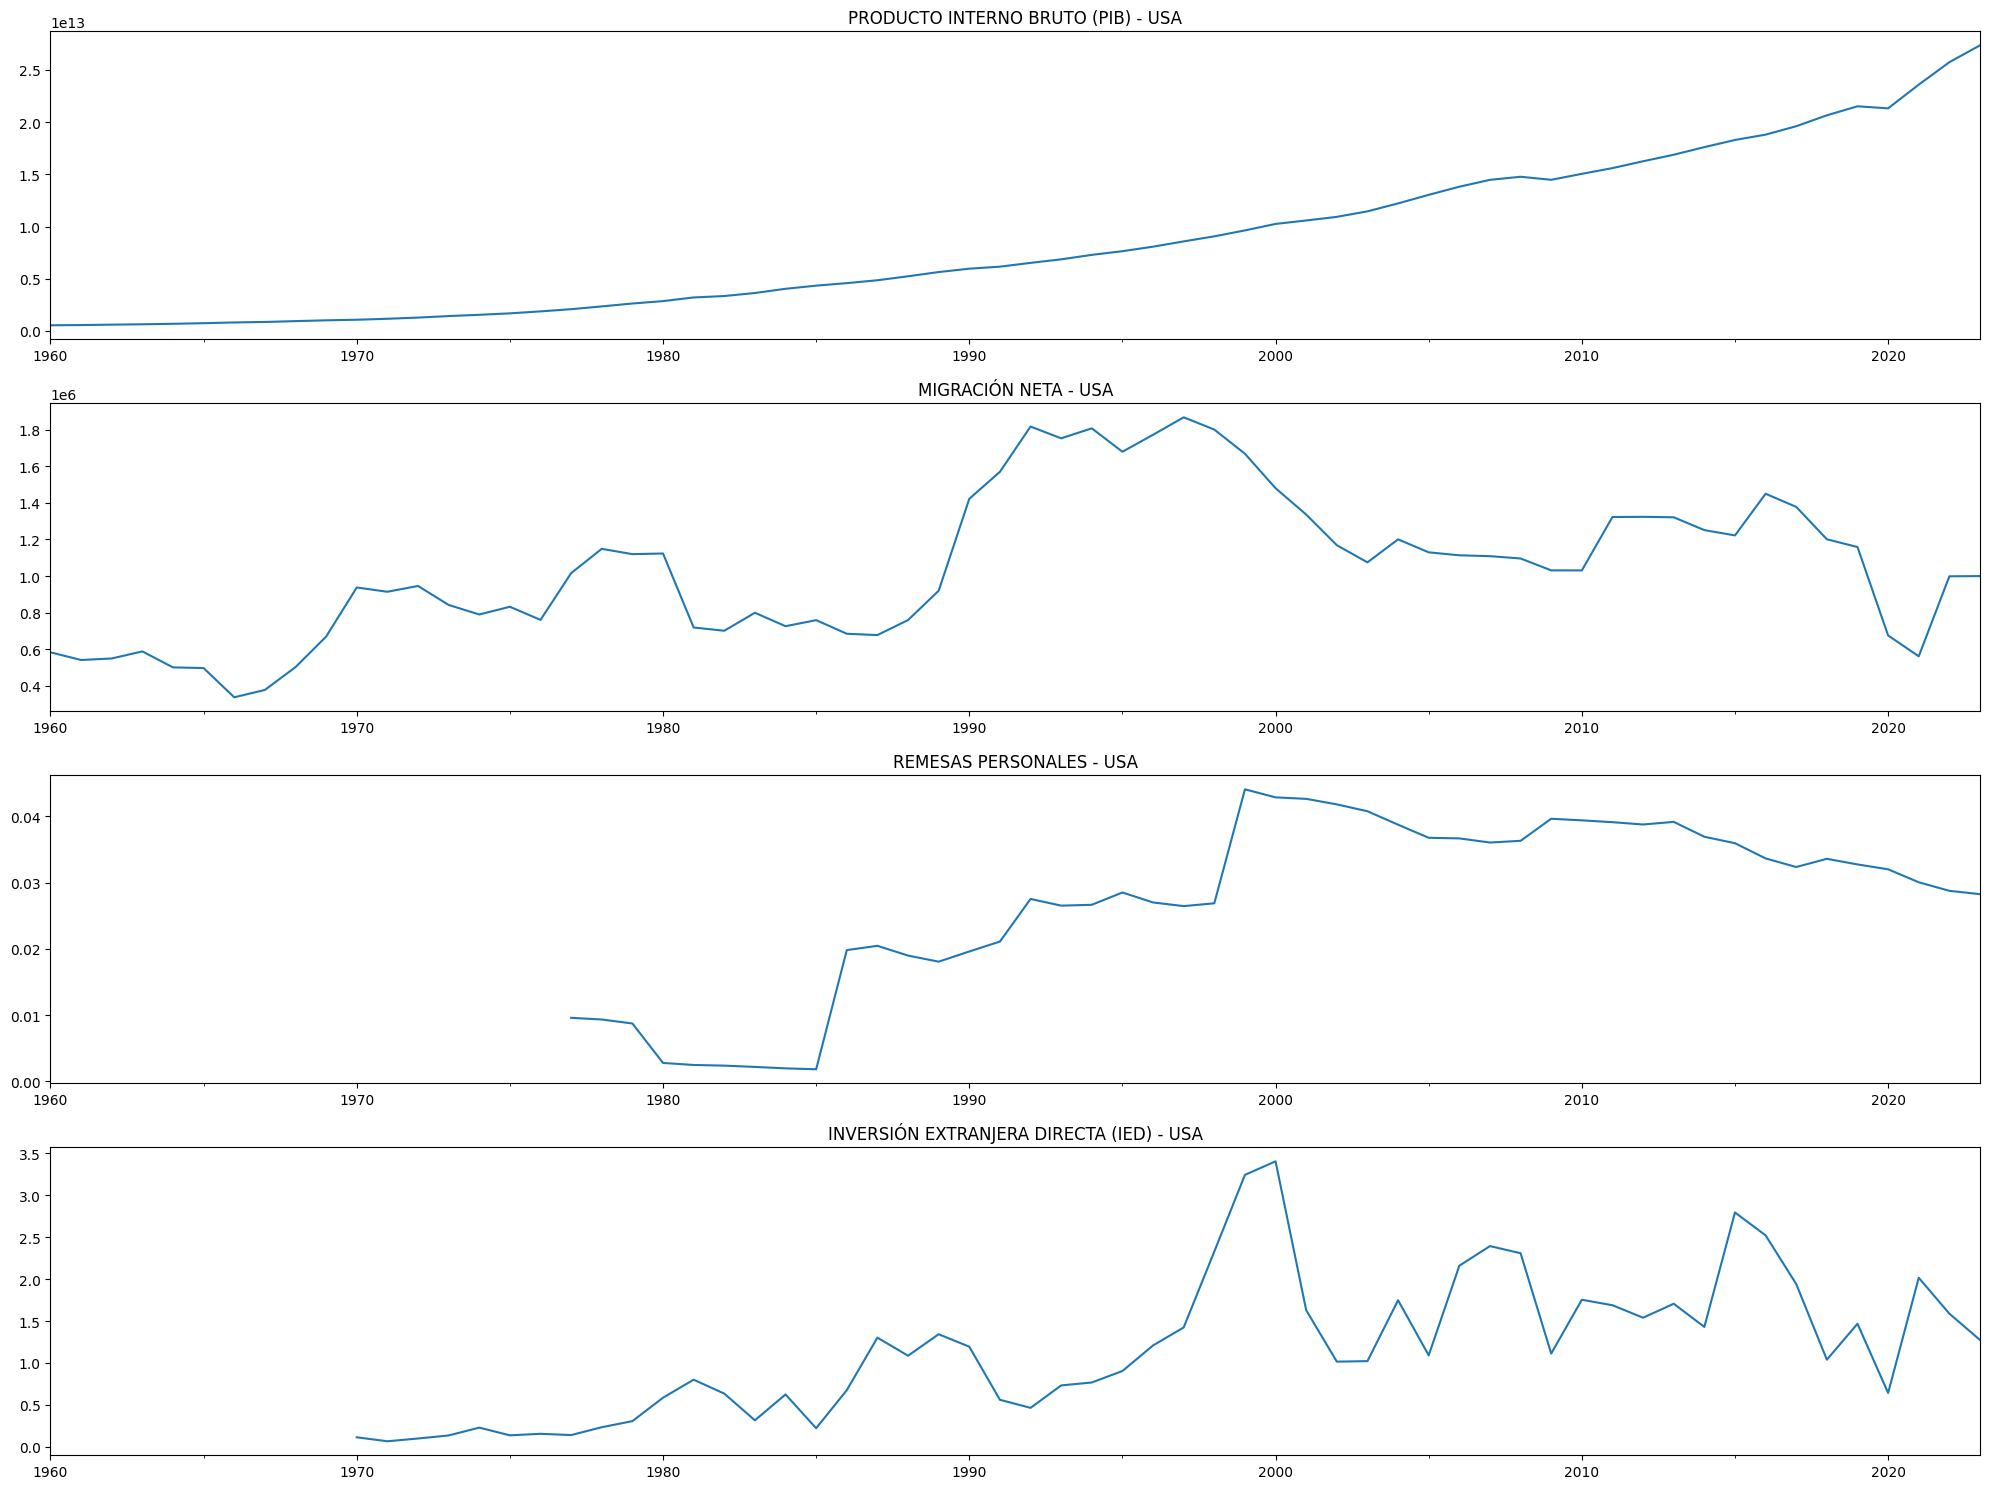

In [1110]:
plot_country_data(pib, mig, rem, ied, 'USA')

Se espera que el PIB refleje directamente el crecimiento económico. Las **remesas** pueden proporcionar **un impulso a corto plazo** en el consumo y la inversión en ciertas economías, mientras que la **migración neta** puede tener **efectos mixtos** dependiendo de si el país recibe o pierde población. Finalmente, una **IED creciente** es generalmente un **indicador positivo** para el crecimiento económico, ya que representa la integración del país en la economía global y mejora su infraestructura y competitividad.



# Parte 2 – Proyección e Intervalos de Confianza  

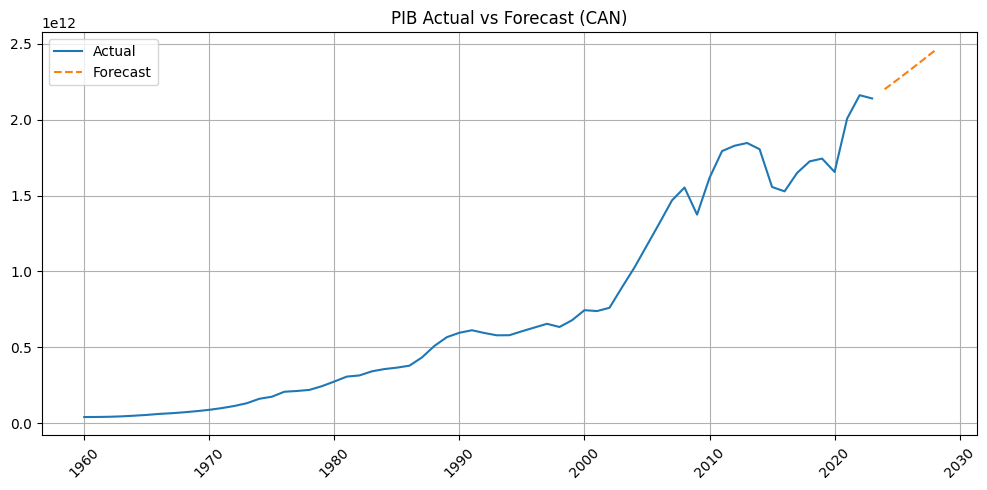

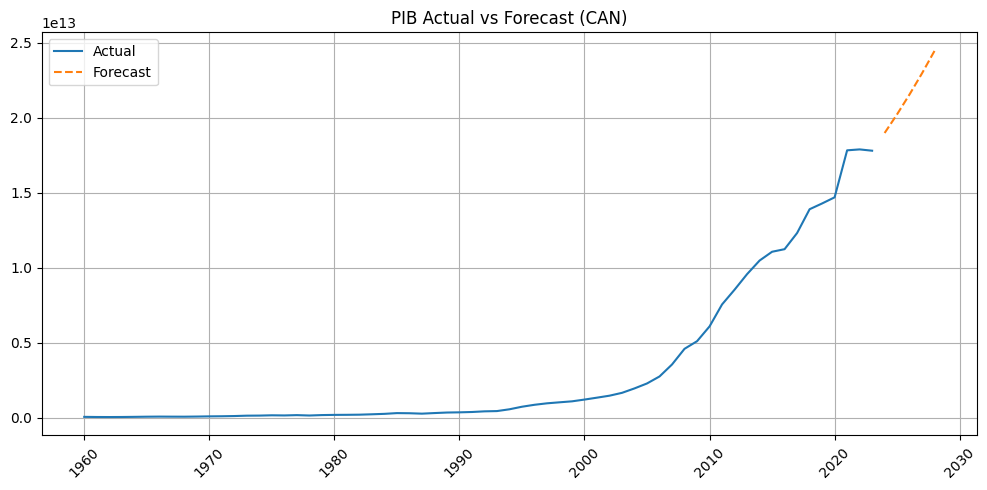

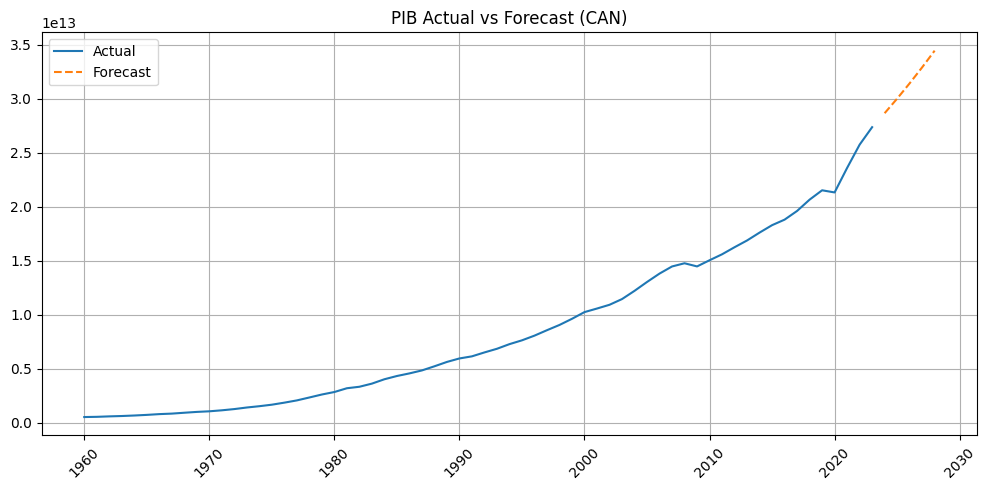

In [1117]:
pib_forecast = forecast(pib, lags = 1, steps = 5)

In [1118]:
pib_forecast

,country_code,mean,lower_bound,upper_bound
0,CAN,2.326648e+12,2.230783e+12,2.422513e+12
1,CHN,2.163752e+13,1.956914e+13,2.370591e+13
2,USA,3.148346e+13,2.930229e+13,3.366462e+13


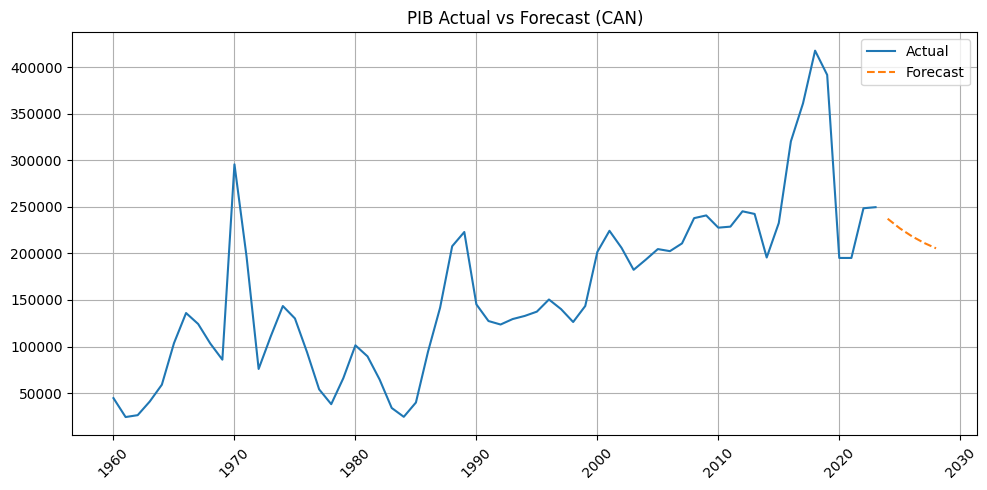

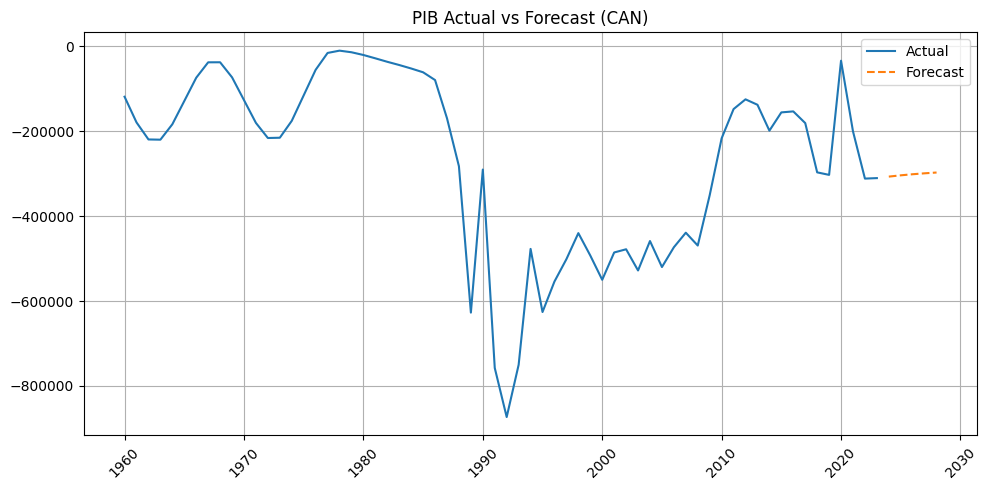

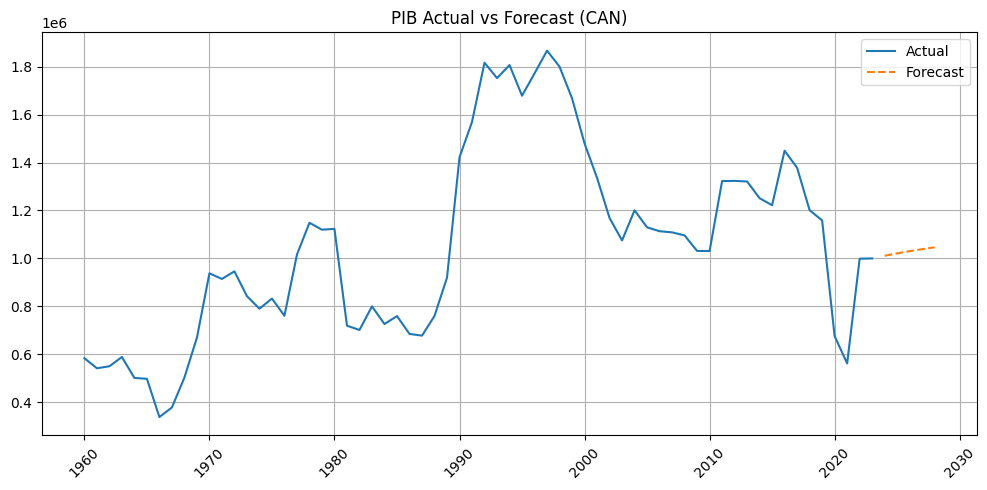

In [1119]:
mig_forecast = forecast(mig, lags = 1, steps = 5)

In [1120]:
mig_forecast

,country_code,mean,lower_bound,upper_bound
0,CAN,2.199600e+05,2.079408e+05,2.319791e+05
1,CHN,-3.014802e+05,-3.051134e+05,-2.978470e+05
2,USA,1.029306e+06,1.016010e+06,1.042603e+06


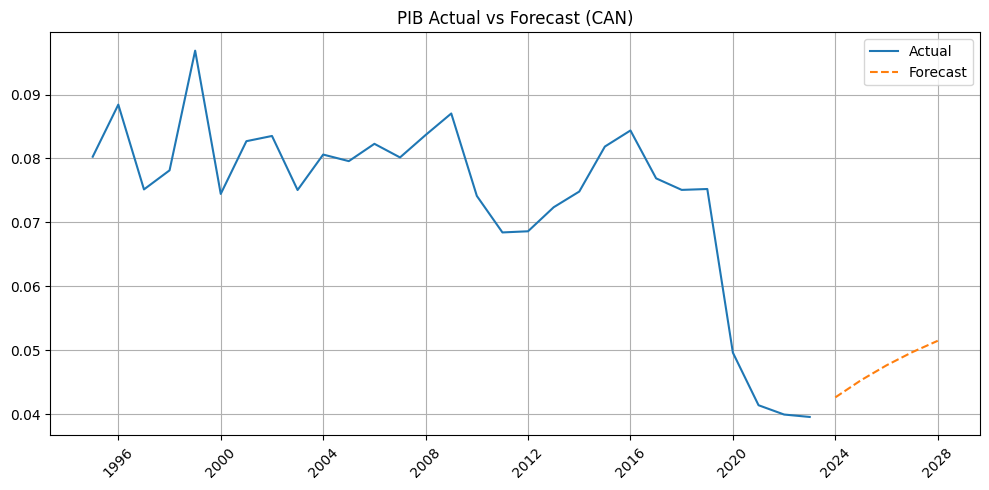

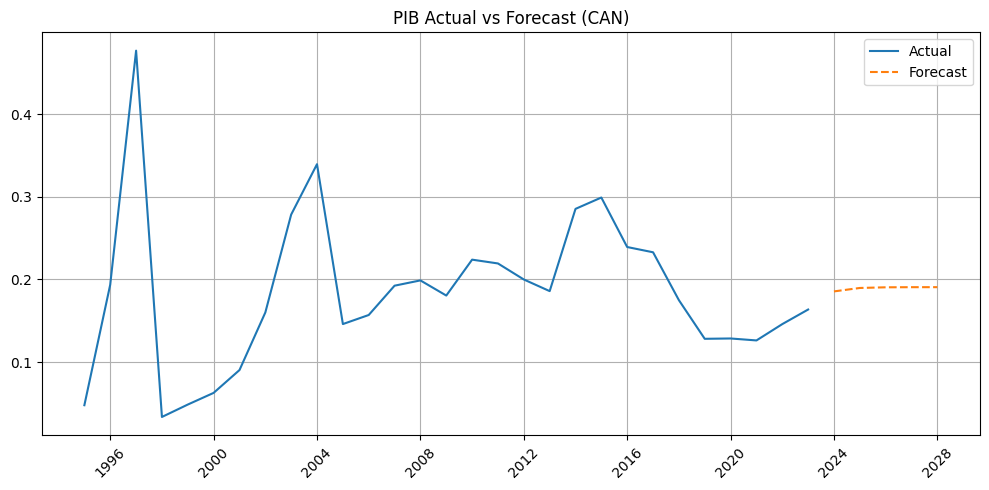

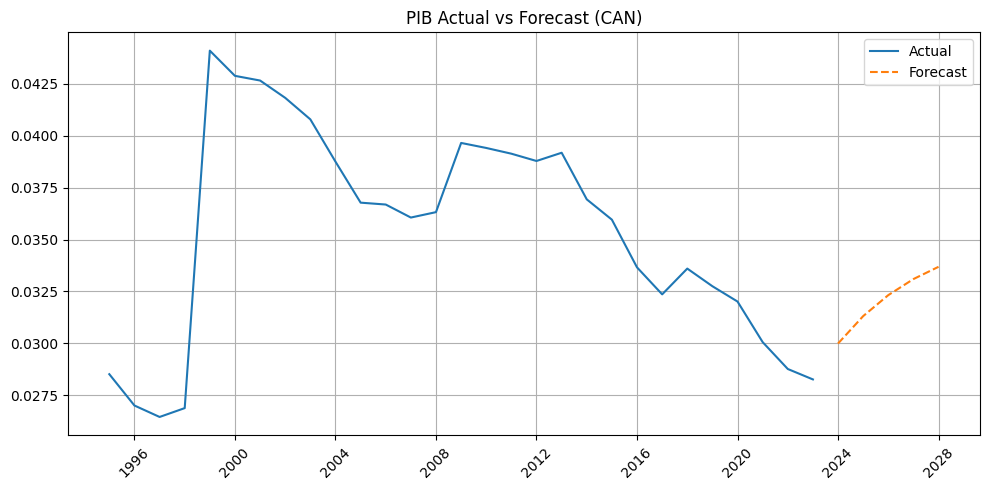

In [1121]:
rem_forecast = forecast(rem, lags = 1, steps = 5)

In [1123]:
rem_forecast

,country_code,mean,lower_bound,upper_bound
0,CAN,0.047371,0.044032,0.050709
1,CHN,0.189419,0.187319,0.191519
2,USA,0.032085,0.030687,0.033483


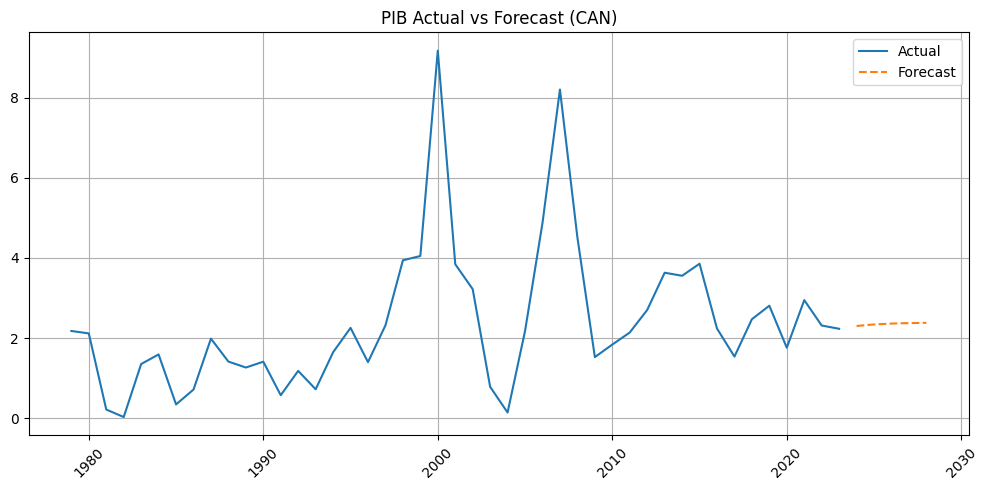

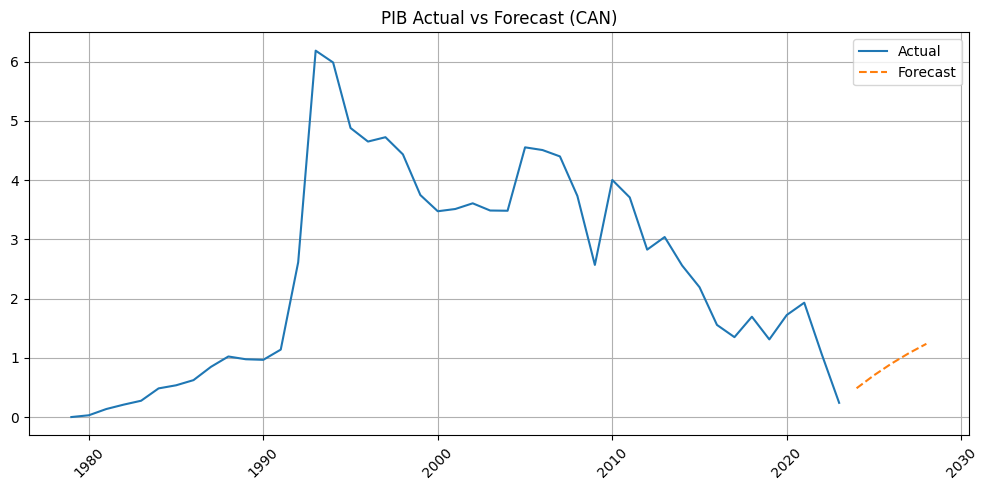

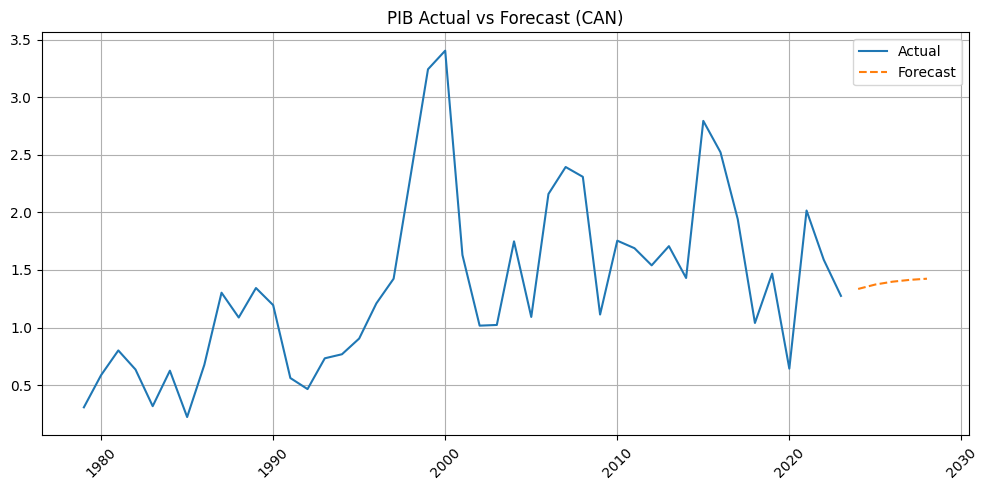

In [1122]:
ied_forecast = forecast(ied, lags = 1, steps = 5)

In [1124]:
ied_forecast

,country_code,mean,lower_bound,upper_bound
0,CAN,2.350857,2.320747,2.380966
1,CHN,0.882236,0.599196,1.165276
2,USA,1.389032,1.355052,1.423011


# Parte 3 – Análisis de Correlación

# Parte 4 – Análisis de Regresión

# Parte 5 – Conclusiones